In [1]:
%matplotlib notebook
%pylab
import scipy.stats as st

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_perfect_model(x):
    pos = 40
    scale = 3
    height = 1
    f = height * sqrt(2*np.pi) * scale * st.distributions.norm.pdf(x, loc=pos, scale=scale)
    return(f)

def get_noisy_model(x, f):
    n = np.random.rand(len(x))*4 - 2.
    return(n+f)

<IPython.core.display.Javascript object>


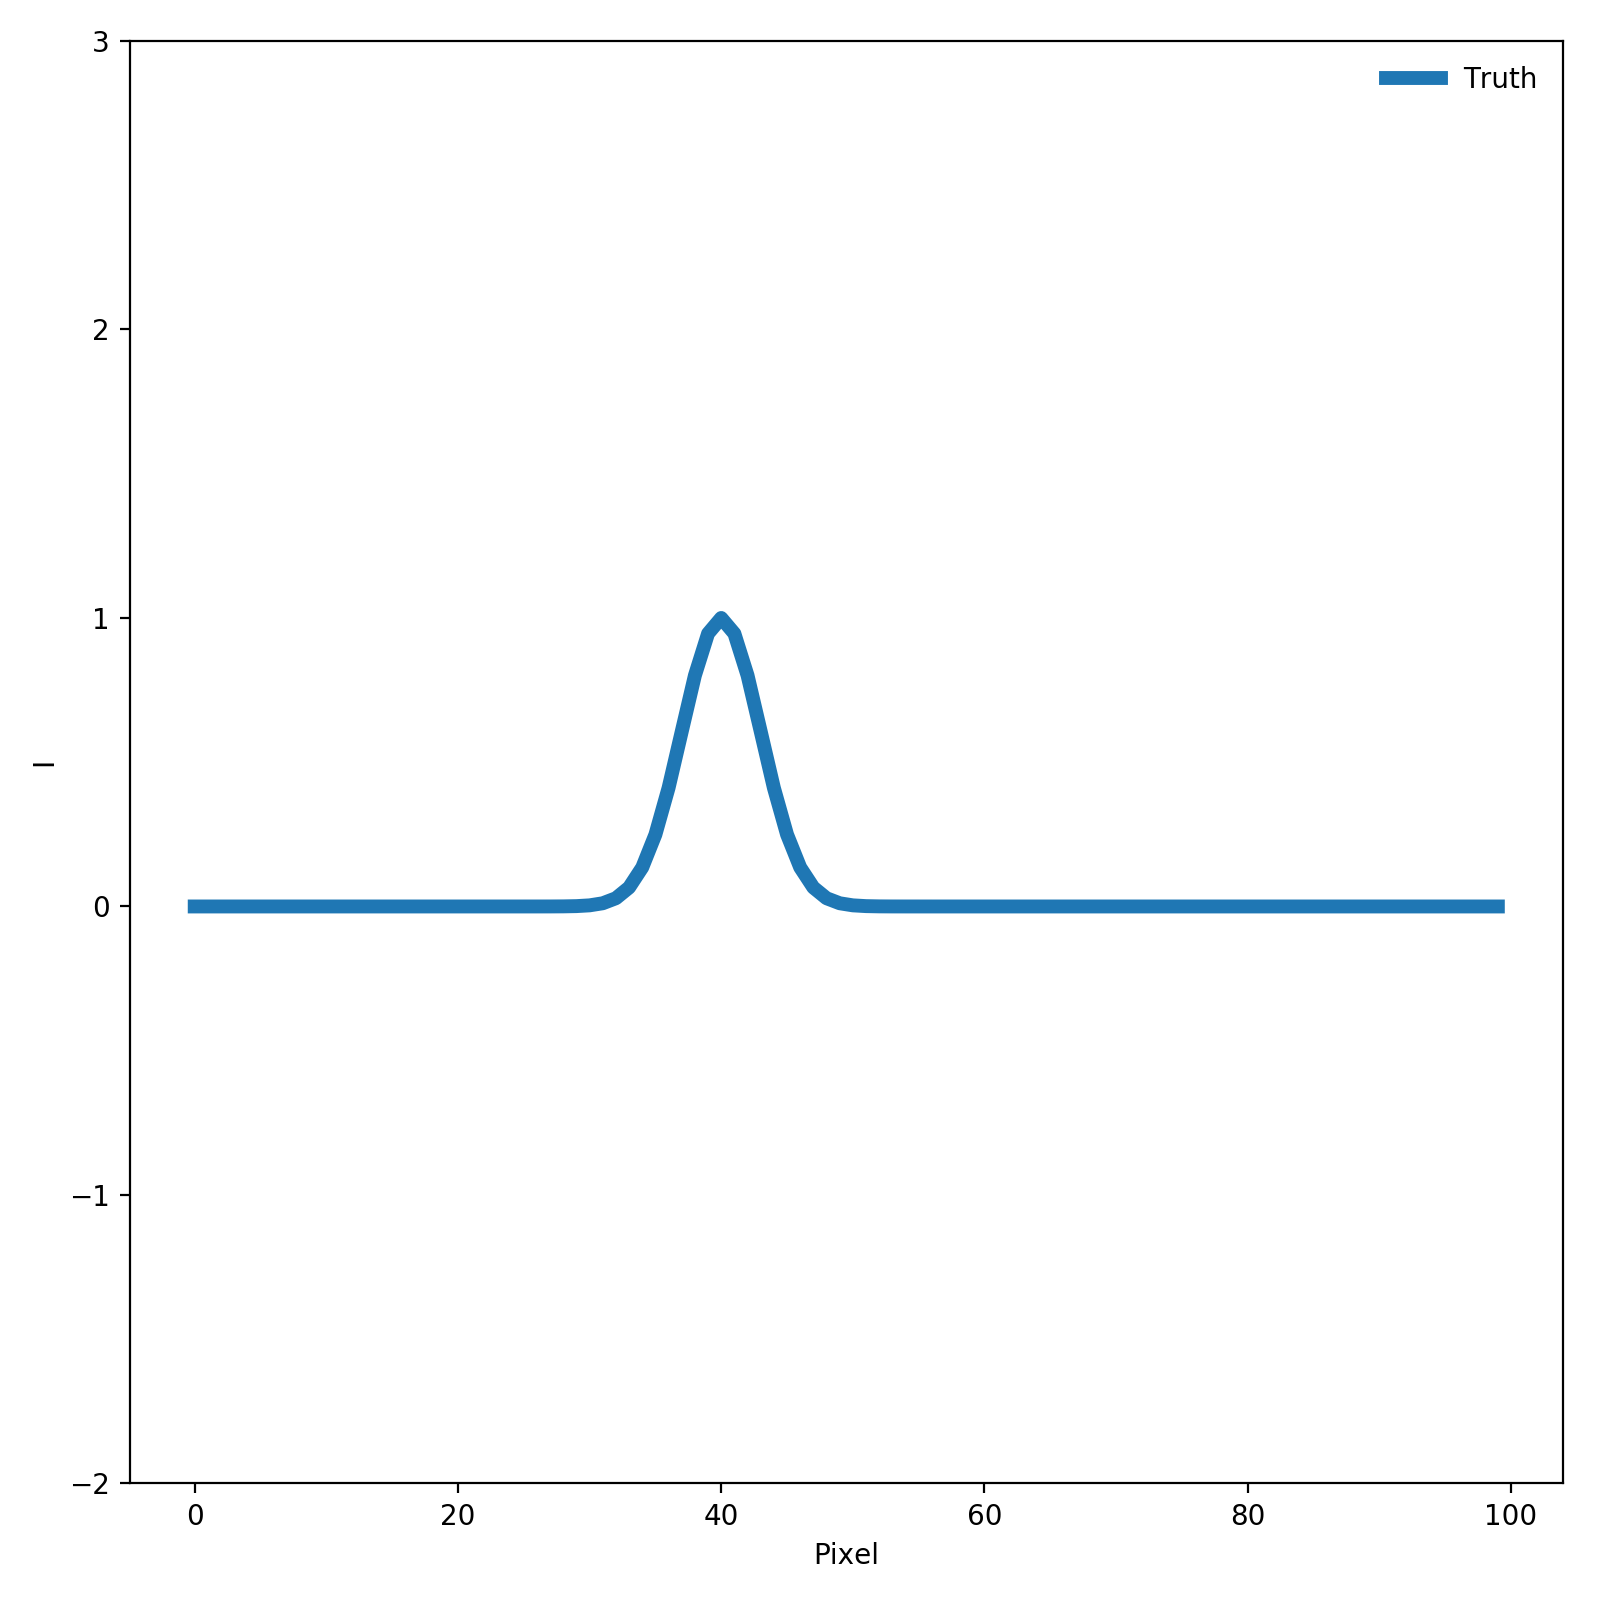

In [3]:
x = np.arange(100)
f = get_perfect_model(x)
figure(figsize=(8,8))
plot(x, f, label='Truth', color='C0', lw=5)
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
legend(frameon = False)
tight_layout()
savefig('media/perfect.pdf')

<IPython.core.display.Javascript object>


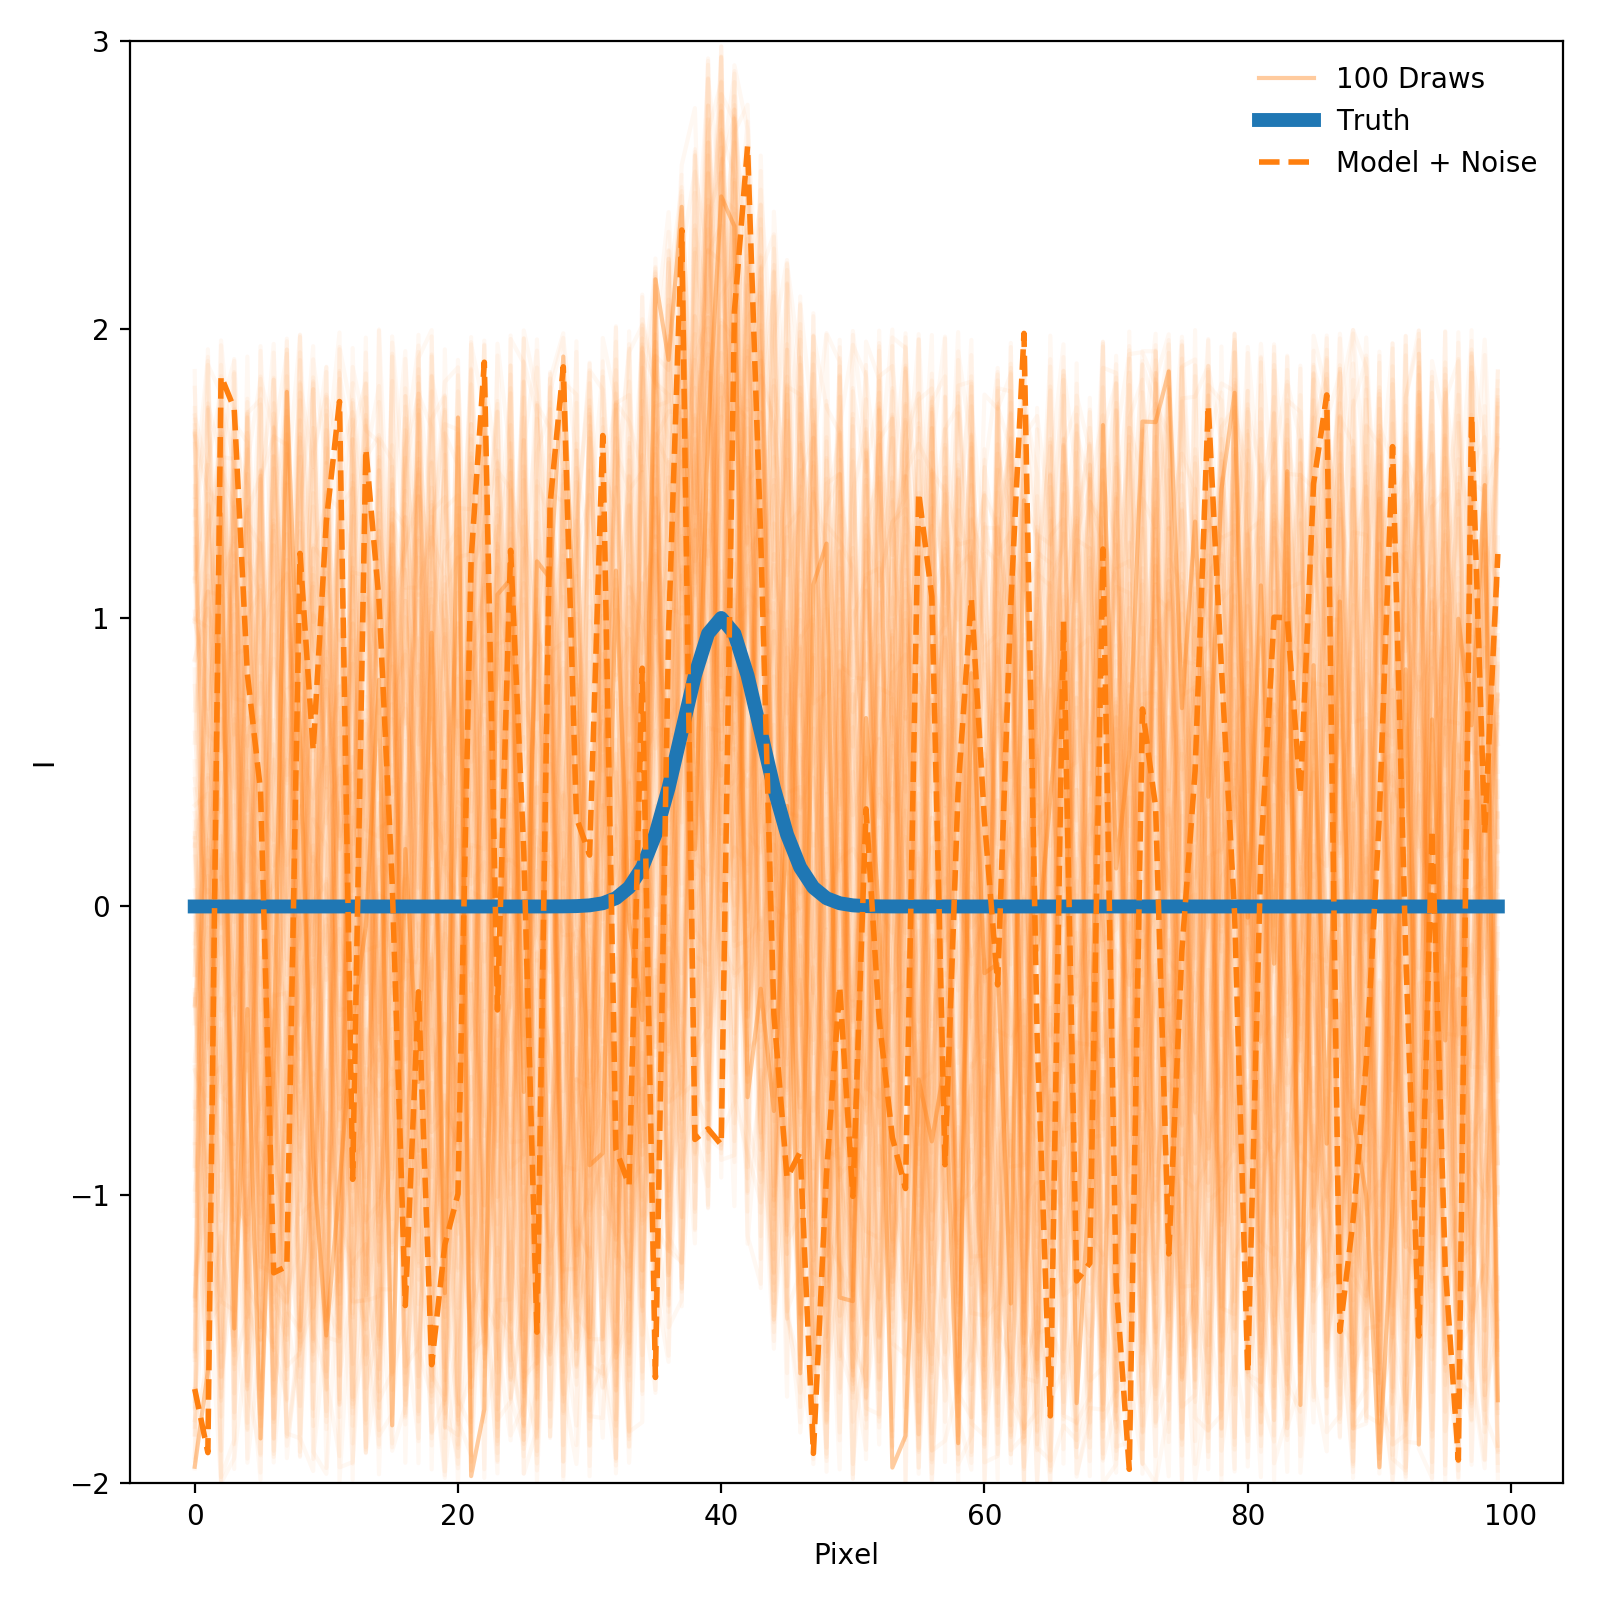

In [4]:
nimages = 1000
im = []
figure(figsize=(8,8))
for i in range(nimages):
    y = get_noisy_model(x, f)
    im.append(y)
    if i%10==0:
        plot(x, y, alpha=0.05, color='C1')
plot(x, y, alpha=0.4, color='C1', label='{:n} Draws'.format(nimages/10))
plot(x, f, label='Truth', color='C0', lw=5)
plot(x, im[0],linestyle='--', label='Model + Noise', color='C1',lw=2)
legend(frameon = False)
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
tight_layout()
savefig('media/noisy.pdf')


<IPython.core.display.Javascript object>


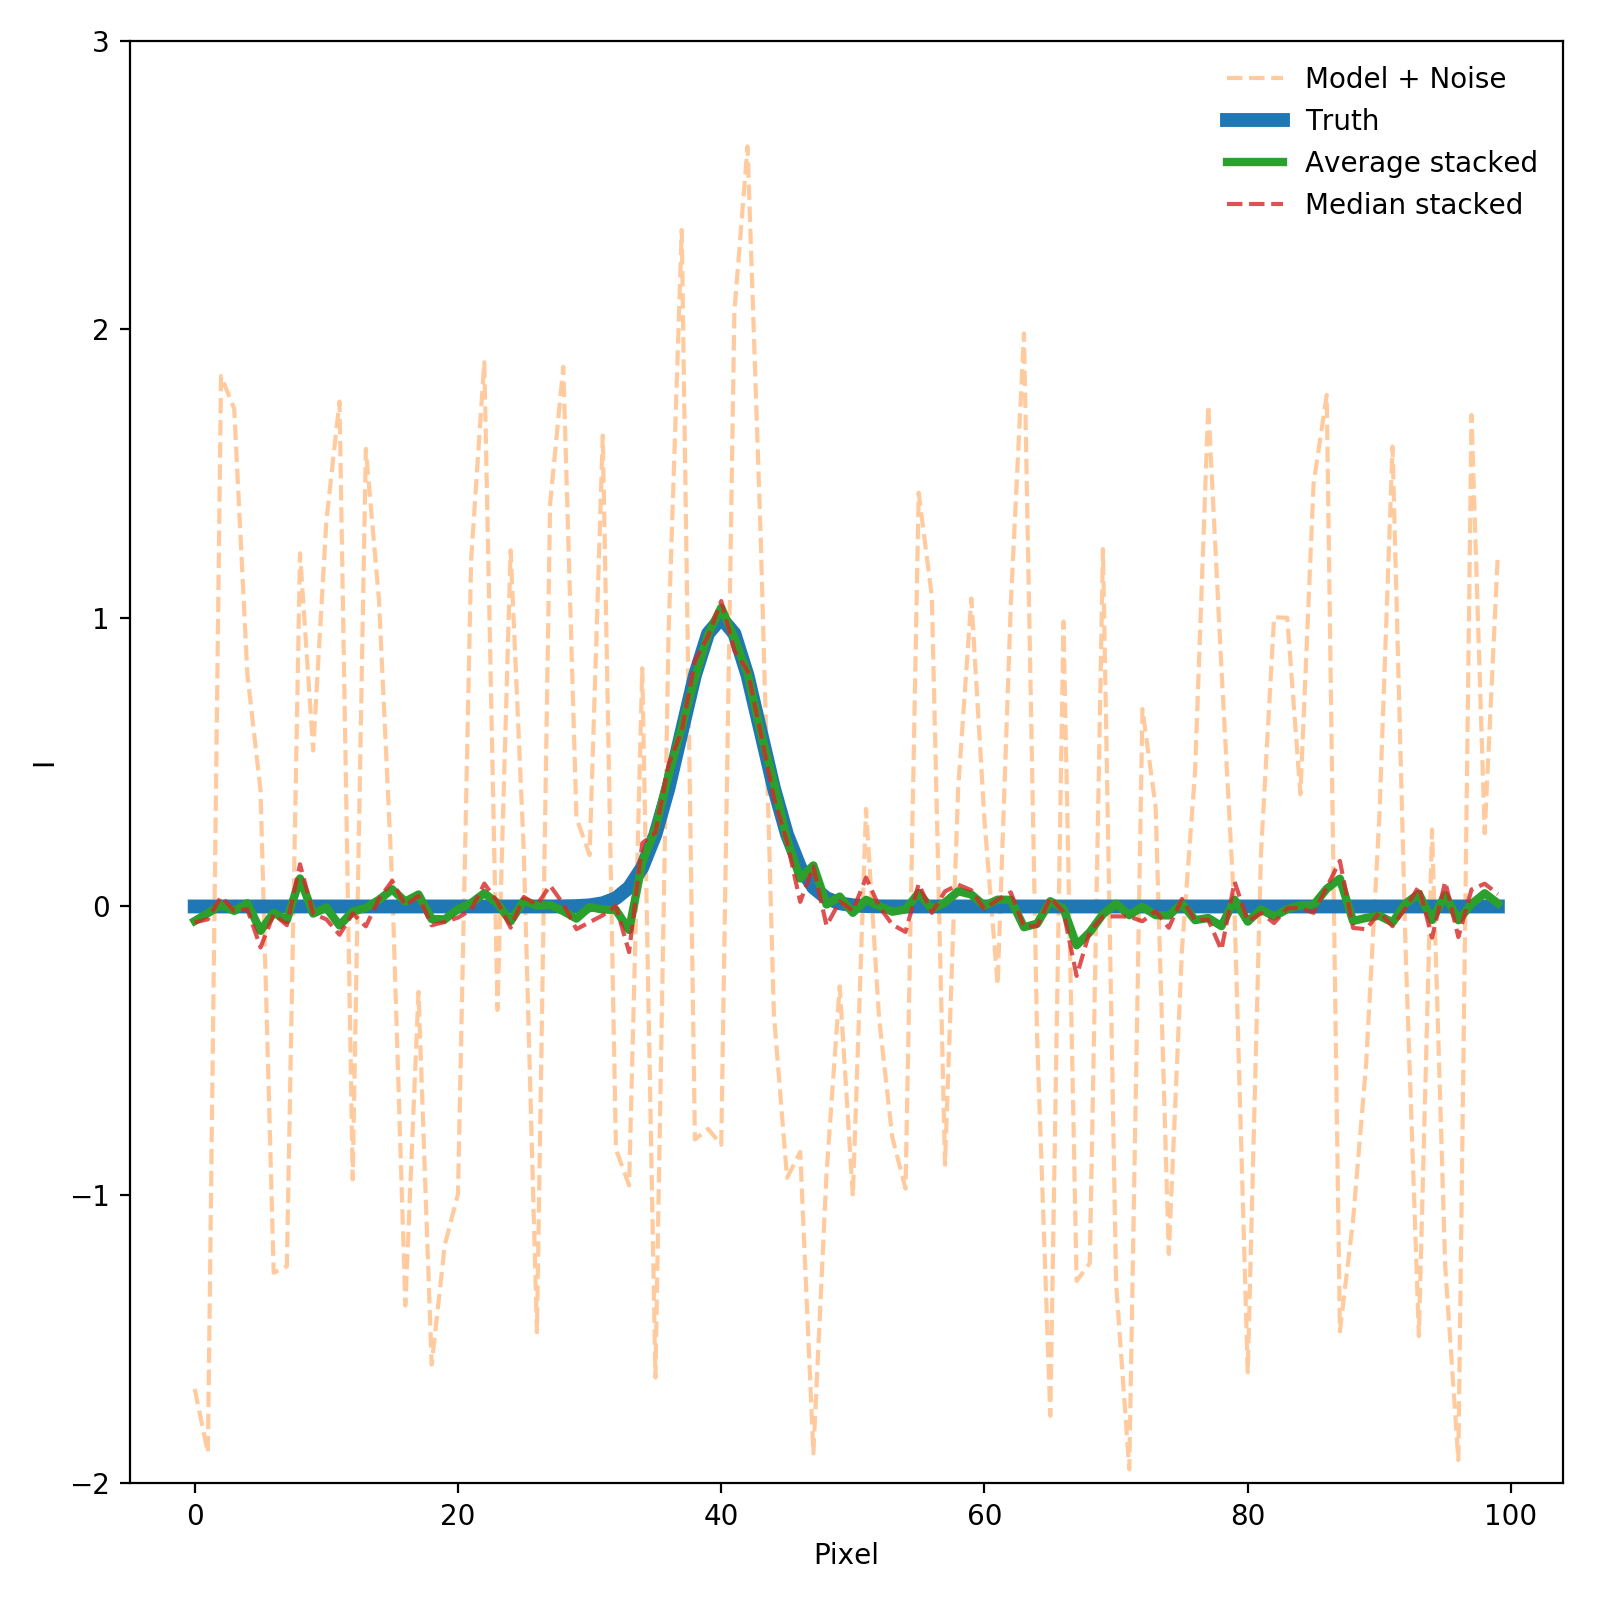

(1000, 100)


In [5]:
figure(figsize=(8,8))
im = np.array(im)
stack = np.cumsum(im, axis=0)
print(stack.shape)
stack1 = np.mean(im, axis=0)
stack2 = np.median(im, axis=0)
plot(x, im[0],linestyle='--', label='Model + Noise', color='C1', alpha=0.4)
plot(x, f, label='Truth', color='C0', lw=5)
plot(x,stack1, label='Average stacked', color='C2', lw=3)
plot(x,stack2, label='Median stacked', color='C3',alpha=0.8, ls='--')
xlabel('Pixel')
ylabel('I')
ylim(-2, 3)
legend(frameon=False)
tight_layout()
savefig('media/stacked.pdf')

<IPython.core.display.Javascript object>


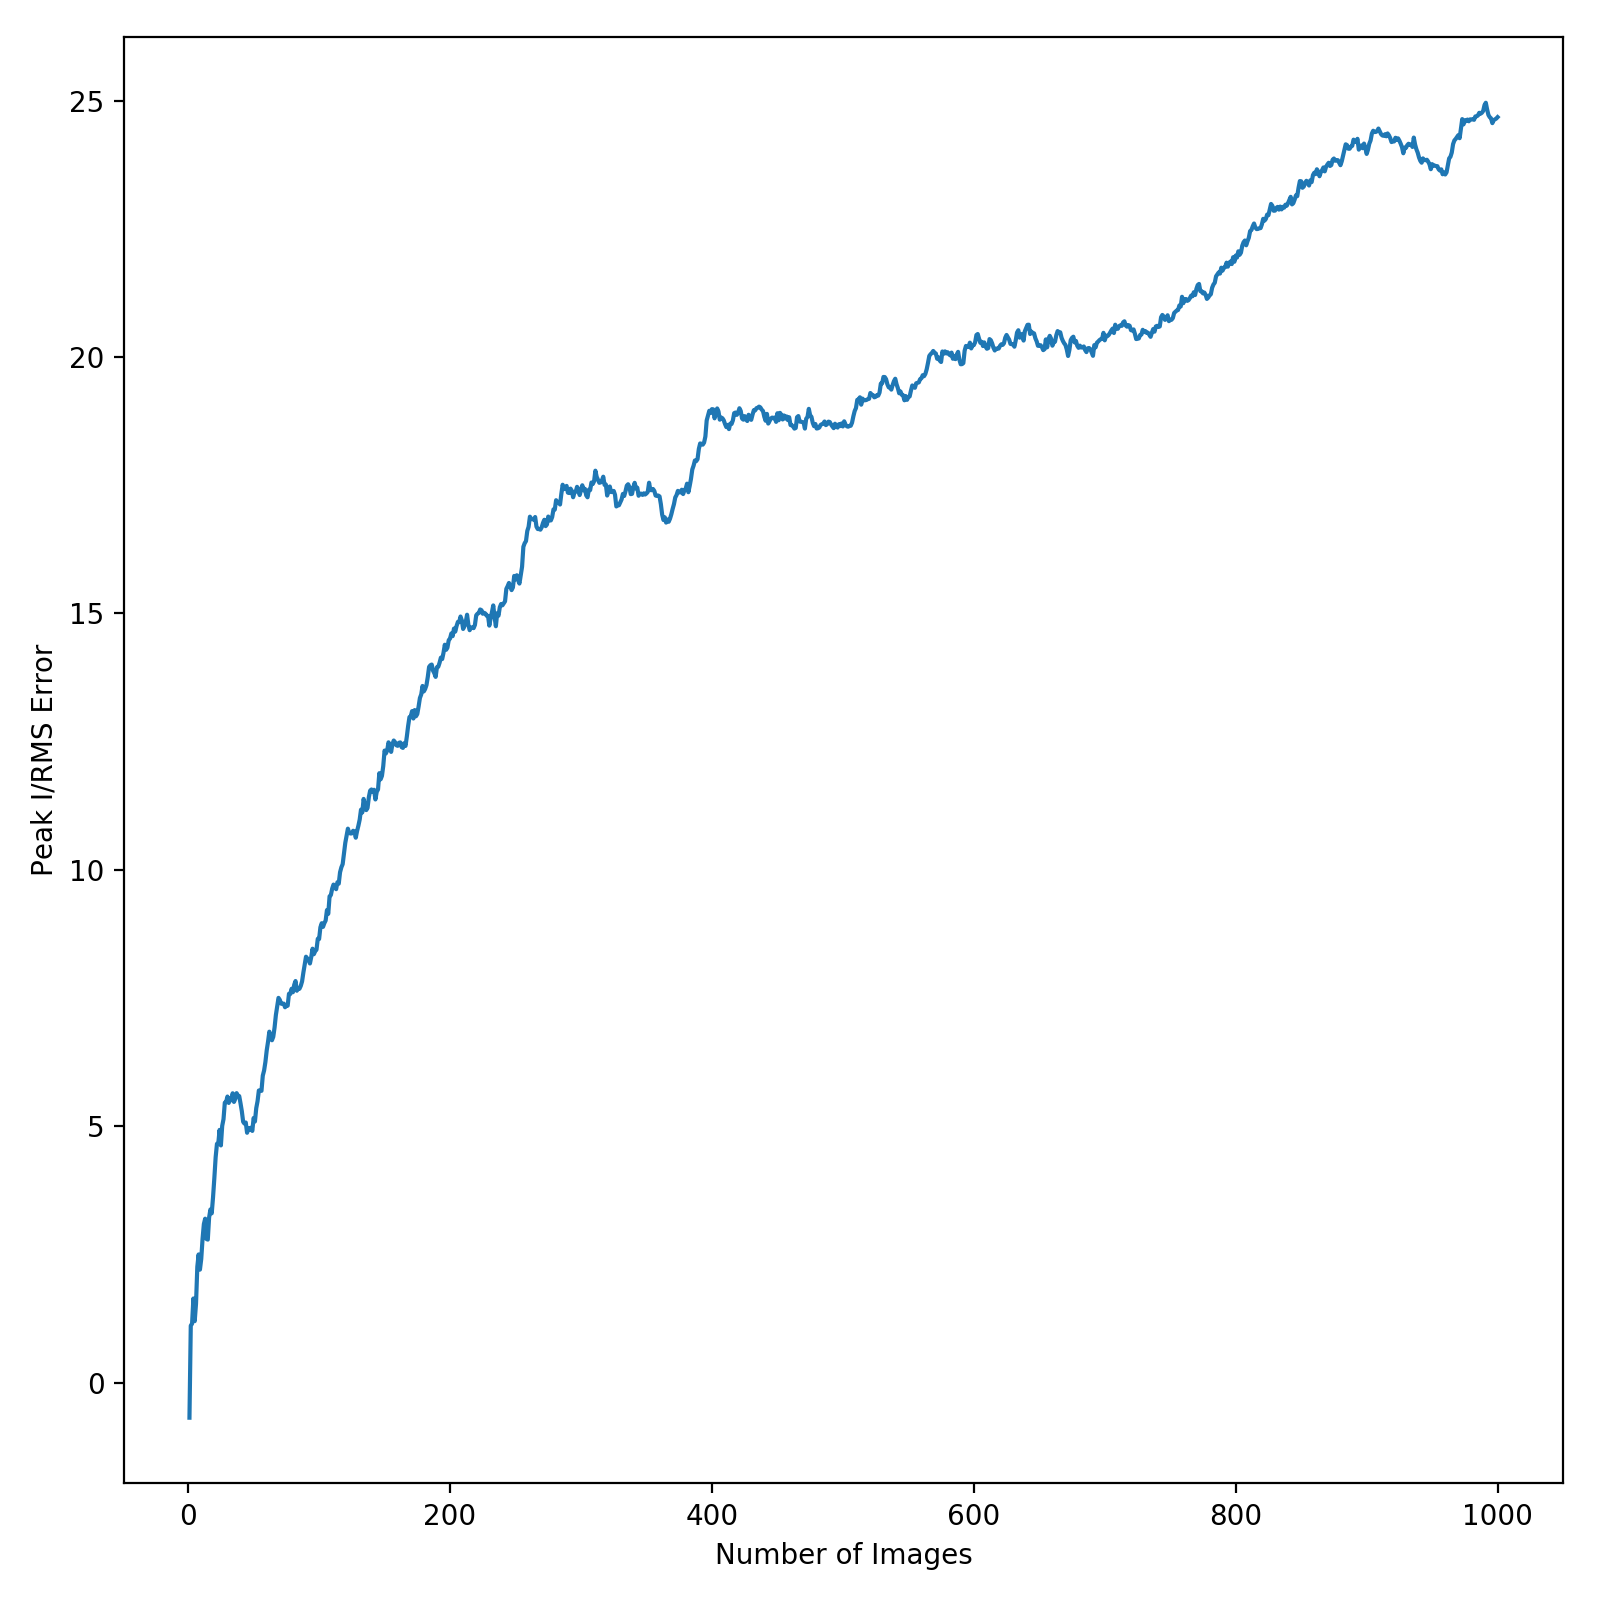

In [6]:
figure(figsize=(8,8))
norm = np.arange(1000)+1
stack_norm = (stack.T[:,]/norm).T
rmse = np.mean((stack_norm - f)**2.,axis=1)**0.5
plot(norm, stack_norm[:,40]/rmse)
xlabel('Number of Images')
ylabel('Peak I/RMS Error')
tight_layout()
savefig('media/SNR.pdf')